# Patterns in Performance: Clustering High School Student Math Course Data

**Names**: Aleksandra Grigortsuk, Wendy Zheng, Yinglei Wu, Xiangrui Deng

## 1. Introduction

Education plays an important role in shaping individuals as well as our societies, shaping students' personal growth in academic and emotional intelligence. Schools aim to measure academic intelligence, grades indicating the measure of acheivement, dedication, and understanding. But not everyone has the equal opportunity to get good grades. By looking at a dataset of Portuguese high school demographics and math course performance, we aim to idenfity through clustering leading factors that could negatively impact a student's final grades. Through the insight we gain by clustering, we can make more informed decisions about teaching and offering help to students who face specific challenges that may or may not be in the student's control. 

Citations:
* https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics/
* https://arxiv.org/ftp/arxiv/papers/2301/2301.03421.pdf
* https://builtin.com/data-science/data-clustering-python


## 2. Dataset Discussion

## 3. Dataset Cleaning and Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#read food.csv
df = pd.read_csv('student_math_clean.csv')
df.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10


## 4. Basic Descriptive Analytics

In [9]:
#seperate numerical data
df_num = df.select_dtypes(include = ['float64', 'int64'])
#remove "student_id" column
df_num = df_num.drop(['student_id'], axis=1)

#summary of the numerical data
df_num.describe()

,age,class_failures,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
#seperate the categorical data
df_cat = df.select_dtypes(include = ['object'])
df_cat.head()

#summary of the categorical data
df_cat.describe()

,school,sex,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,...,travel_time,study_time,school_support,family_support,extra_paid_classes,activities,nursery_school,higher_ed,internet_access,romantic_relationship
count,395,395,395,395,395,395,395,395,395,395,...,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,5,5,4,...,4,4,2,2,2,2,2,2,2,2
top,GP,F,Urban,Greater than 3,Living together,higher education,5th to 9th grade,other,other,course,...,<15 min.,2 to 5 hours,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,131,115,141,217,145,...,257,198,344,242,214,201,314,375,329,263


[('weekday_alcohol', 'weekend_alcohol'),
 ('weekend_alcohol', 'weekday_alcohol'),
 ('grade_1', 'grade_2'),
 ('grade_1', 'final_grade'),
 ('grade_2', 'grade_1'),
 ('grade_2', 'final_grade'),
 ('final_grade', 'grade_1'),
 ('final_grade', 'grade_2')]

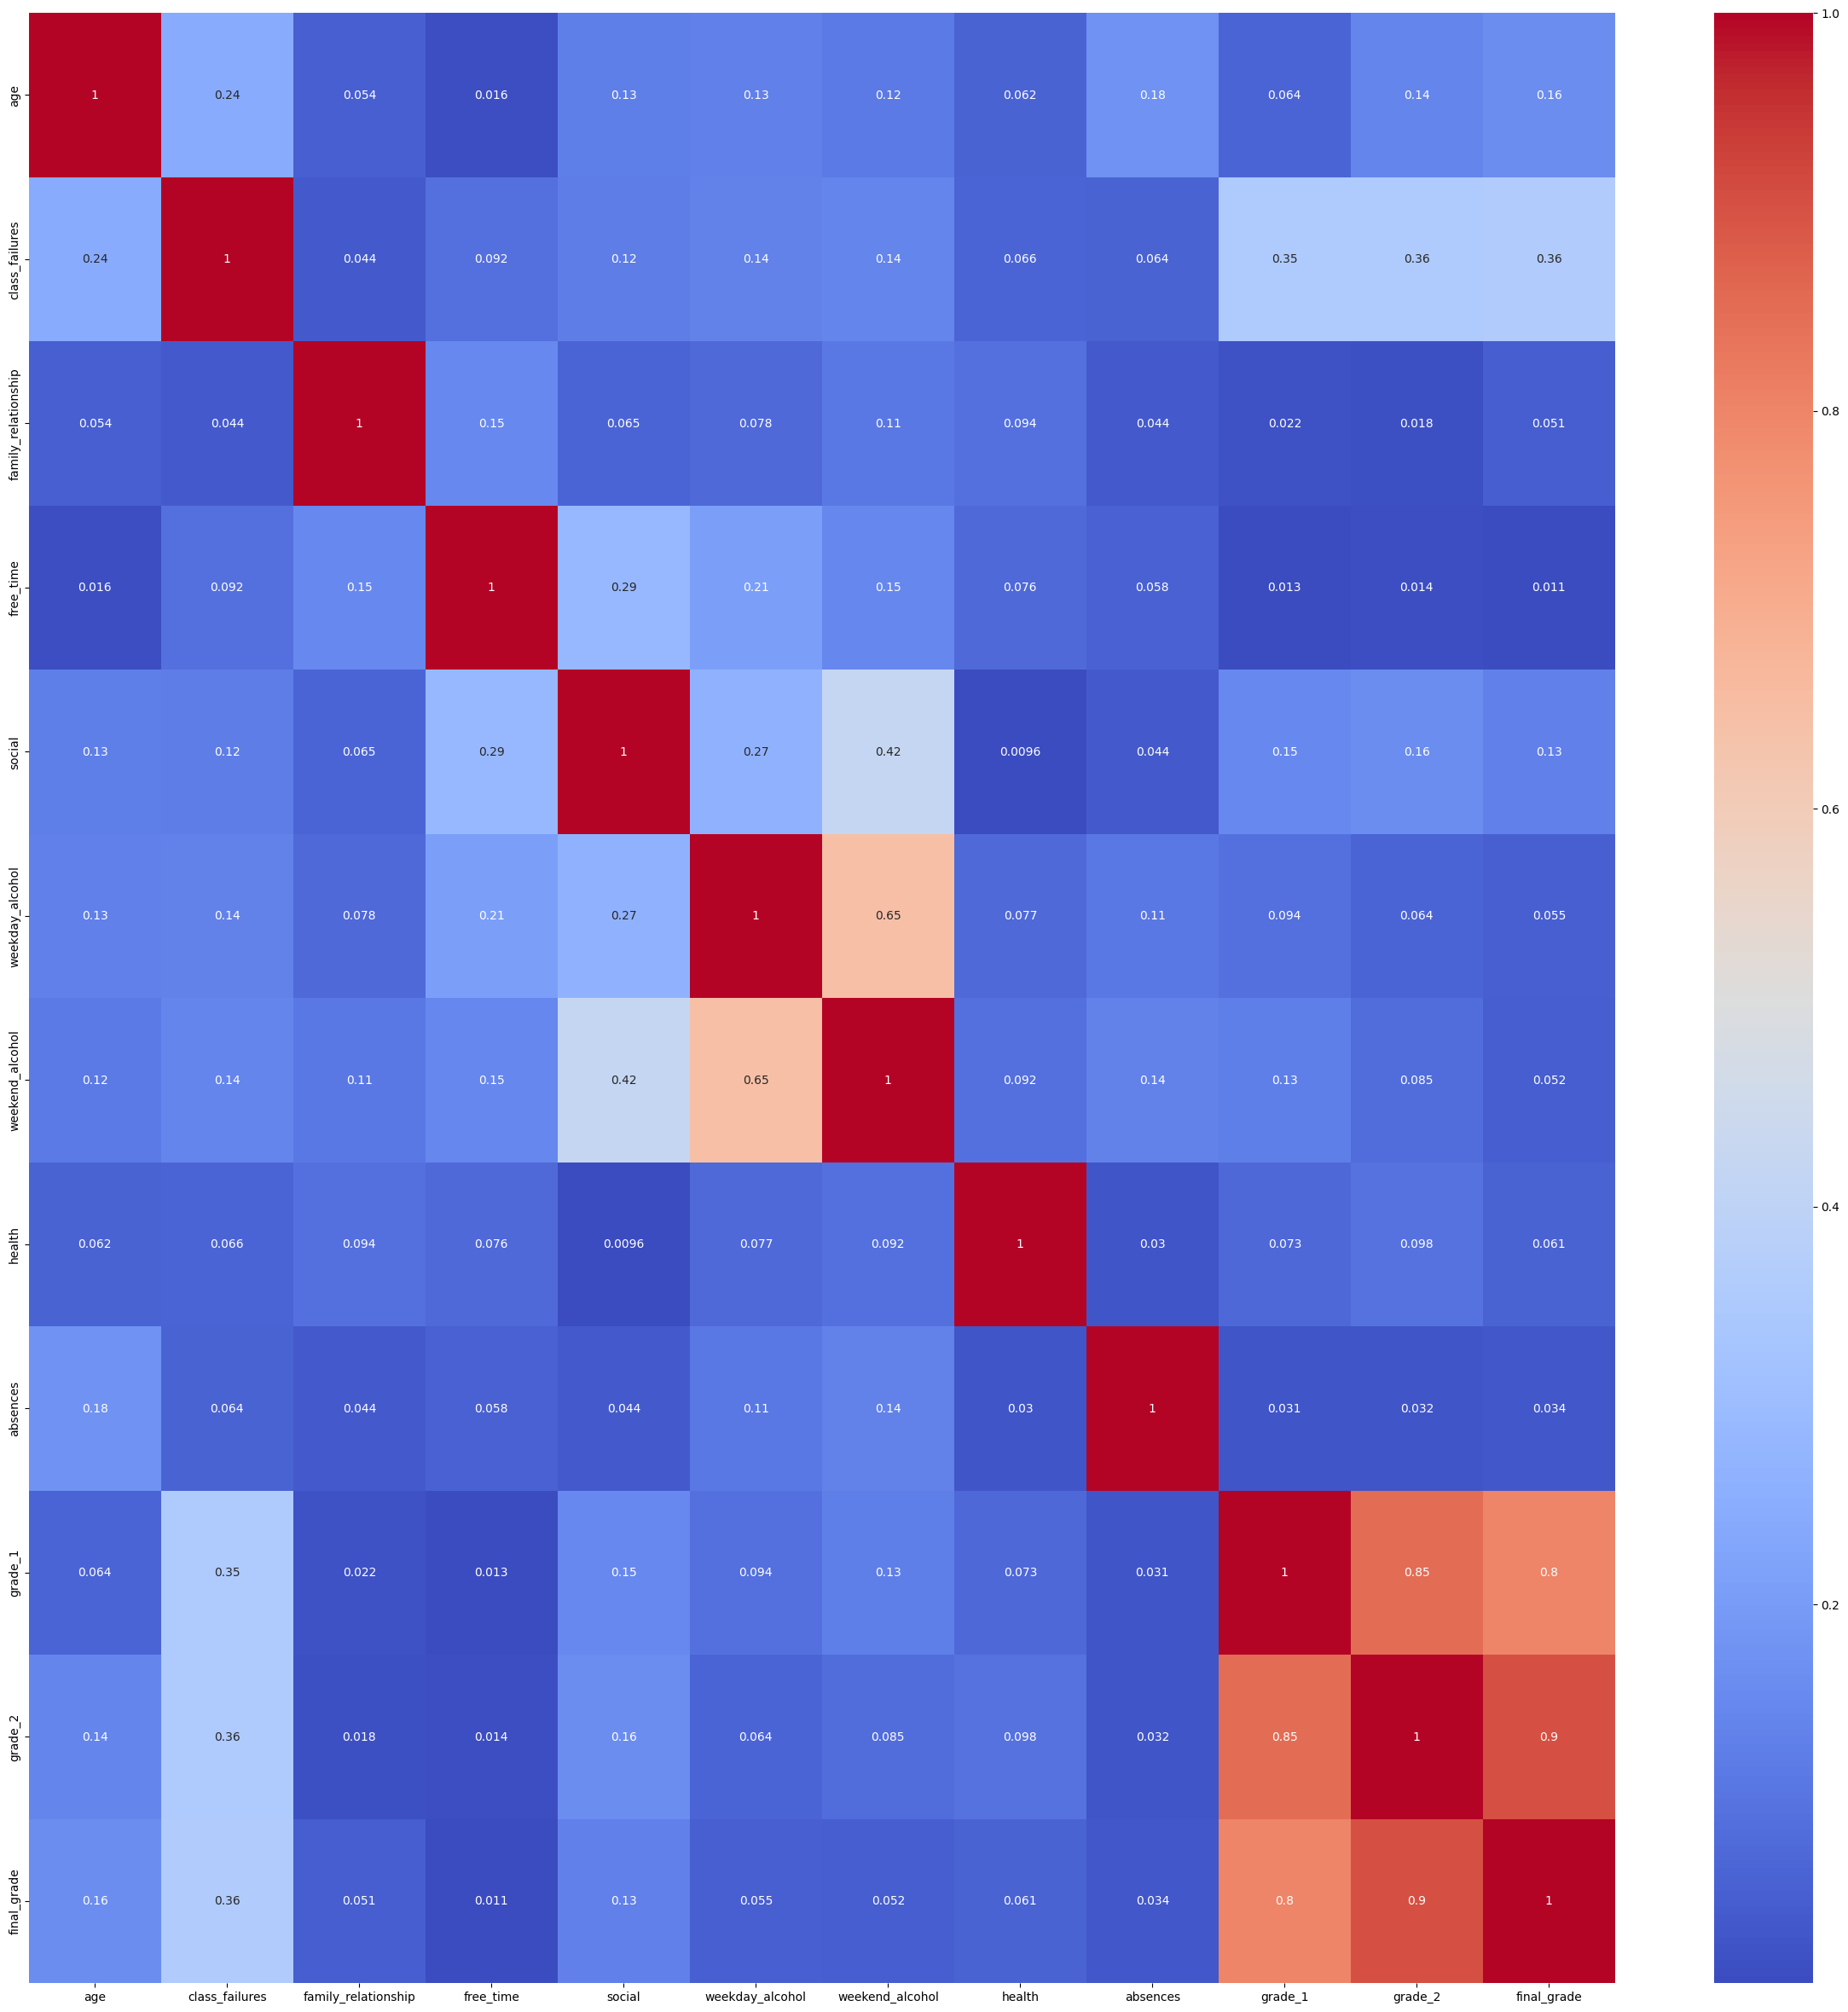

In [11]:
#pairwise correlation of numerical data
df_num_corr = df_num.corr()
df_num_corr

#heatmap of the correlation
fig, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(abs(df_num_corr), annot = True, cmap = 'coolwarm')

high_corr_pairs = [(column, correlated_column) 
                   for column in df_num_corr.columns 
                   for correlated_column in  df_num_corr.columns 
                   if (abs(df_num_corr.loc[column, correlated_column]) > 0.5) and (column != correlated_column)]

high_corr_pairs


Grade 1 is highly correlated with grade 2 and final grade. Alcohol consumption patterns (weekday_alcohol and weekend_alcohol) are also correlated, otherwise there aren't many numerical pairwise correlation.

<Axes: >

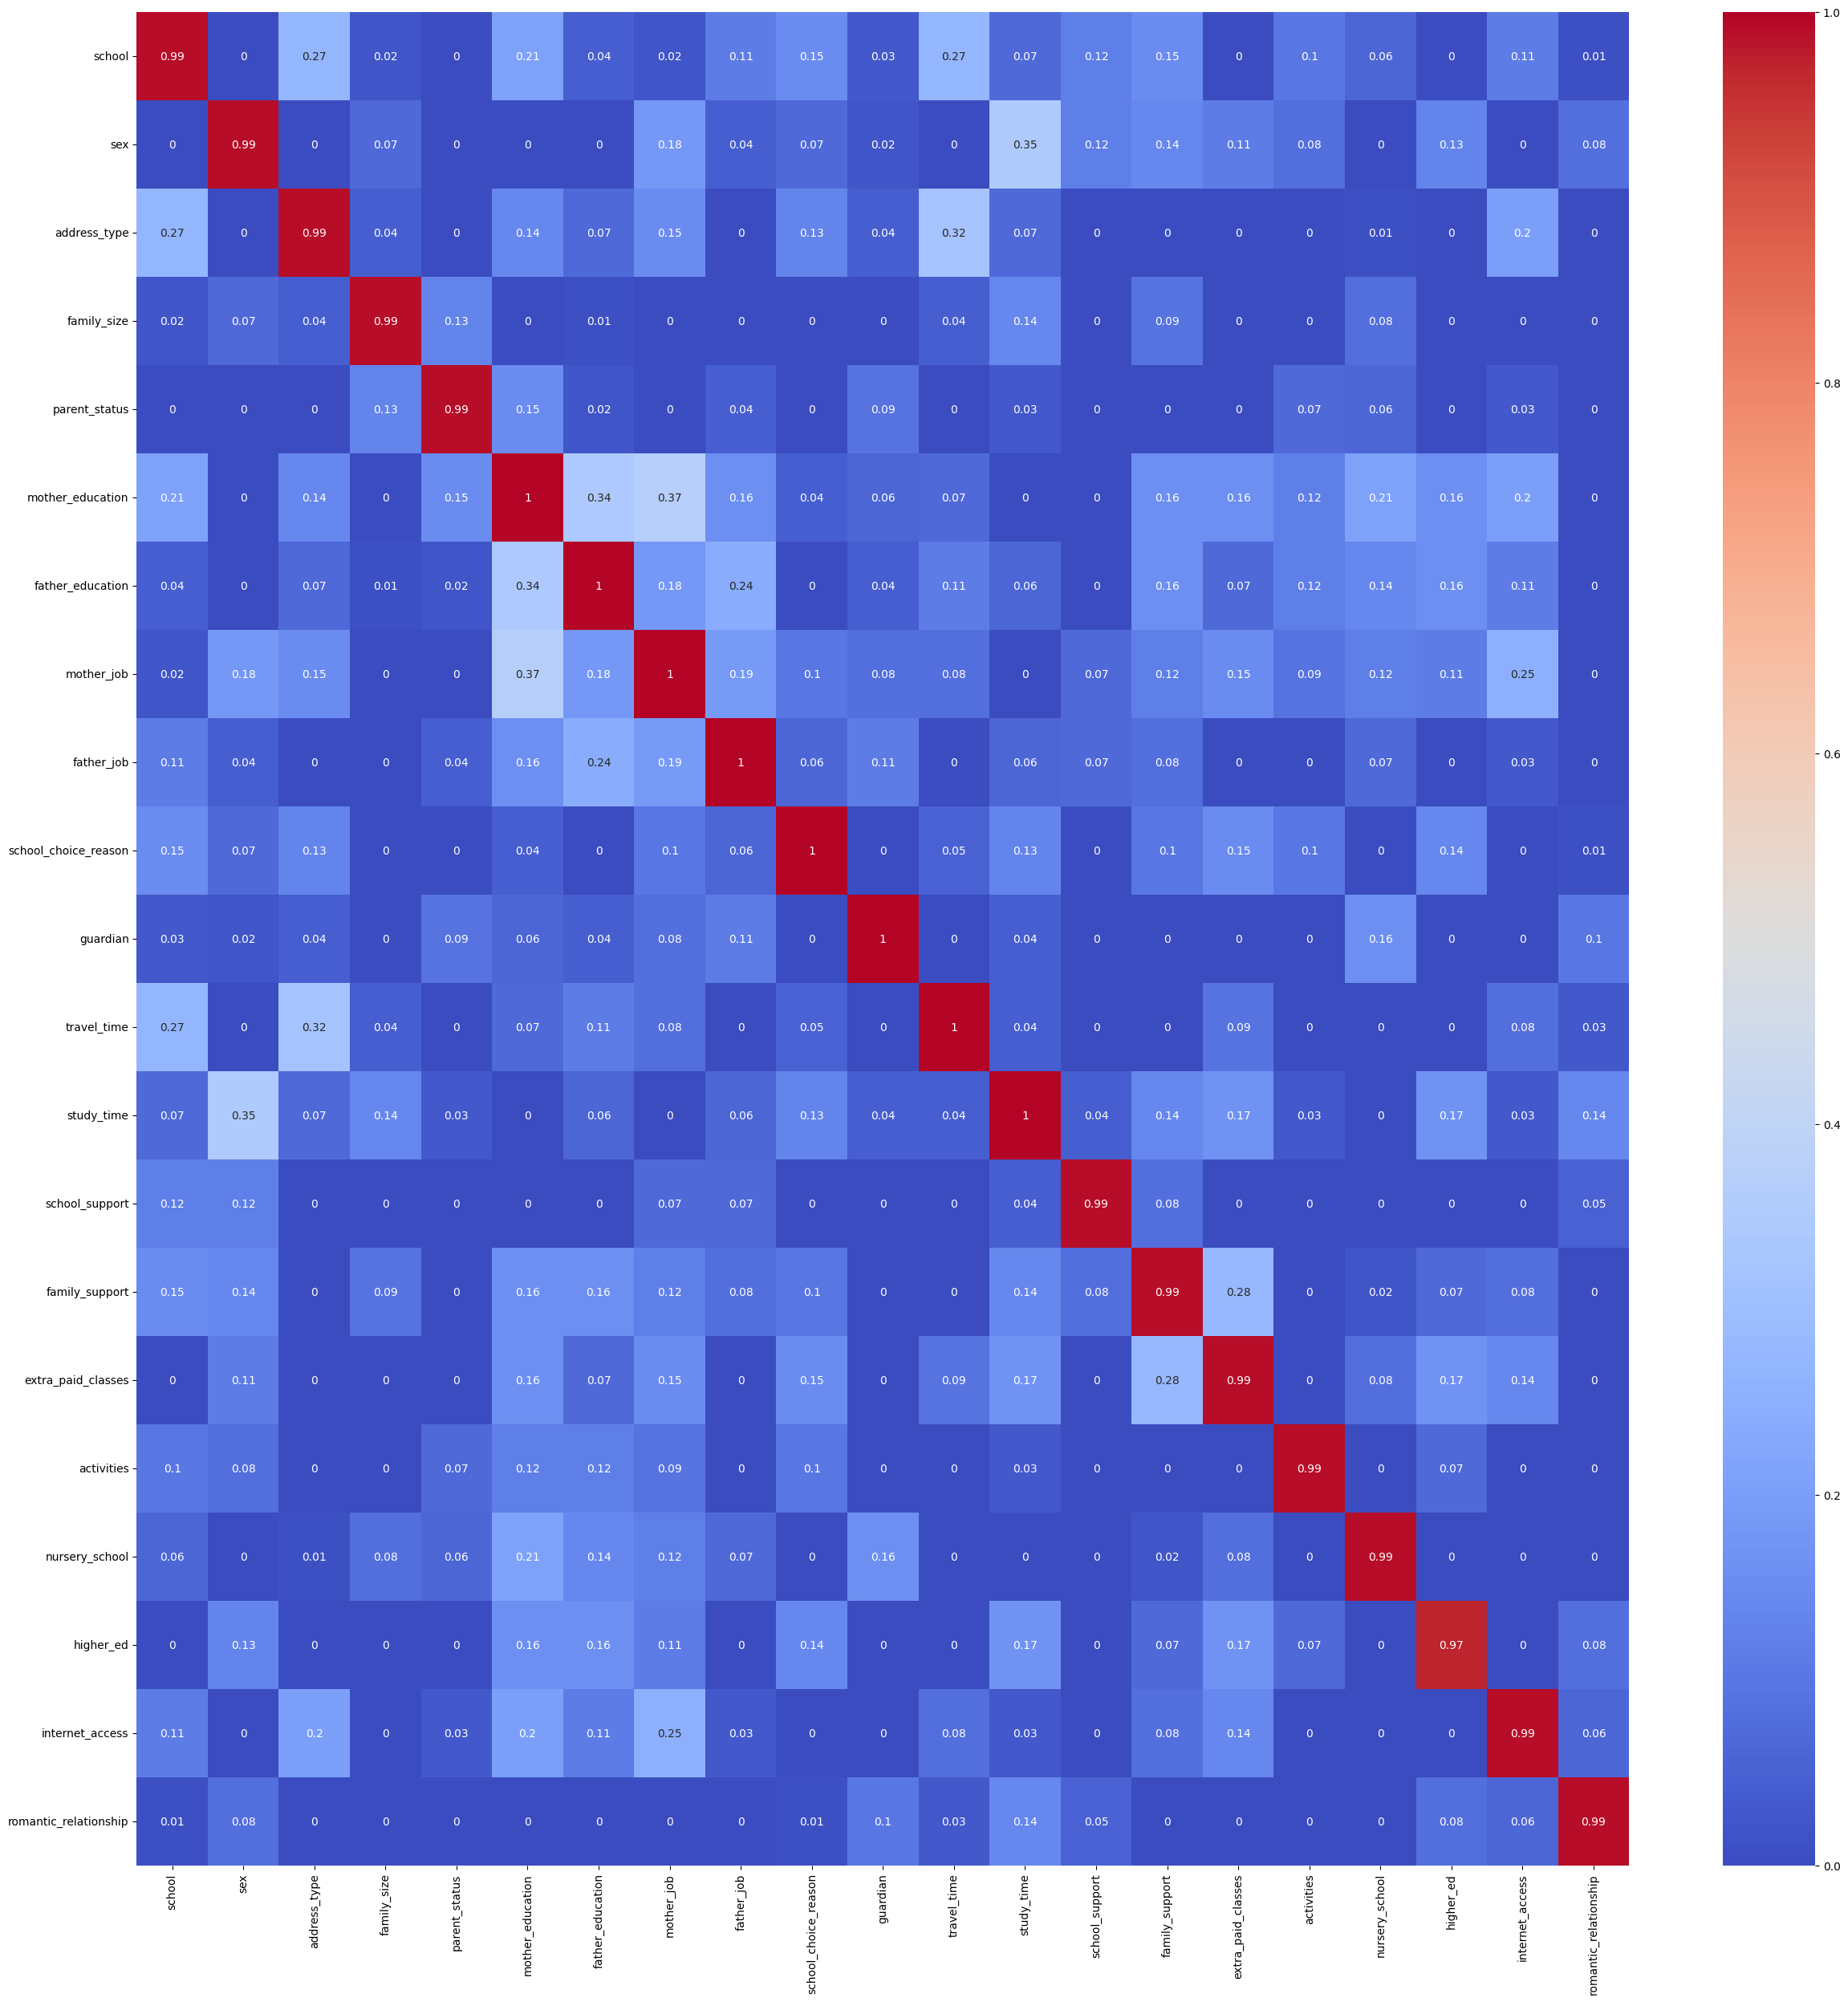

In [13]:
#contingency table for categorical variables
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

#pairwise correlation of categorical data
rows= []

for var1 in df_cat:
    col = []
    for var2 in df_cat :
        cramers =cramers_corrected_stat(pd.crosstab(df_cat[var1], df_cat[var2]))
        col.append(round(cramers,2)) # Keeping of to two decimal
    rows.append(col)

cramers_results = np.array(rows)
df_cat_corr = pd.DataFrame(cramers_results, columns = df_cat.columns, index =df_cat.columns)

#heatmap of the correlation
fig, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(abs(df_cat_corr), annot = True, cmap = 'coolwarm')



According to the heatmap, the categorical variables does not have significant pairwise correlation.

<Axes: >

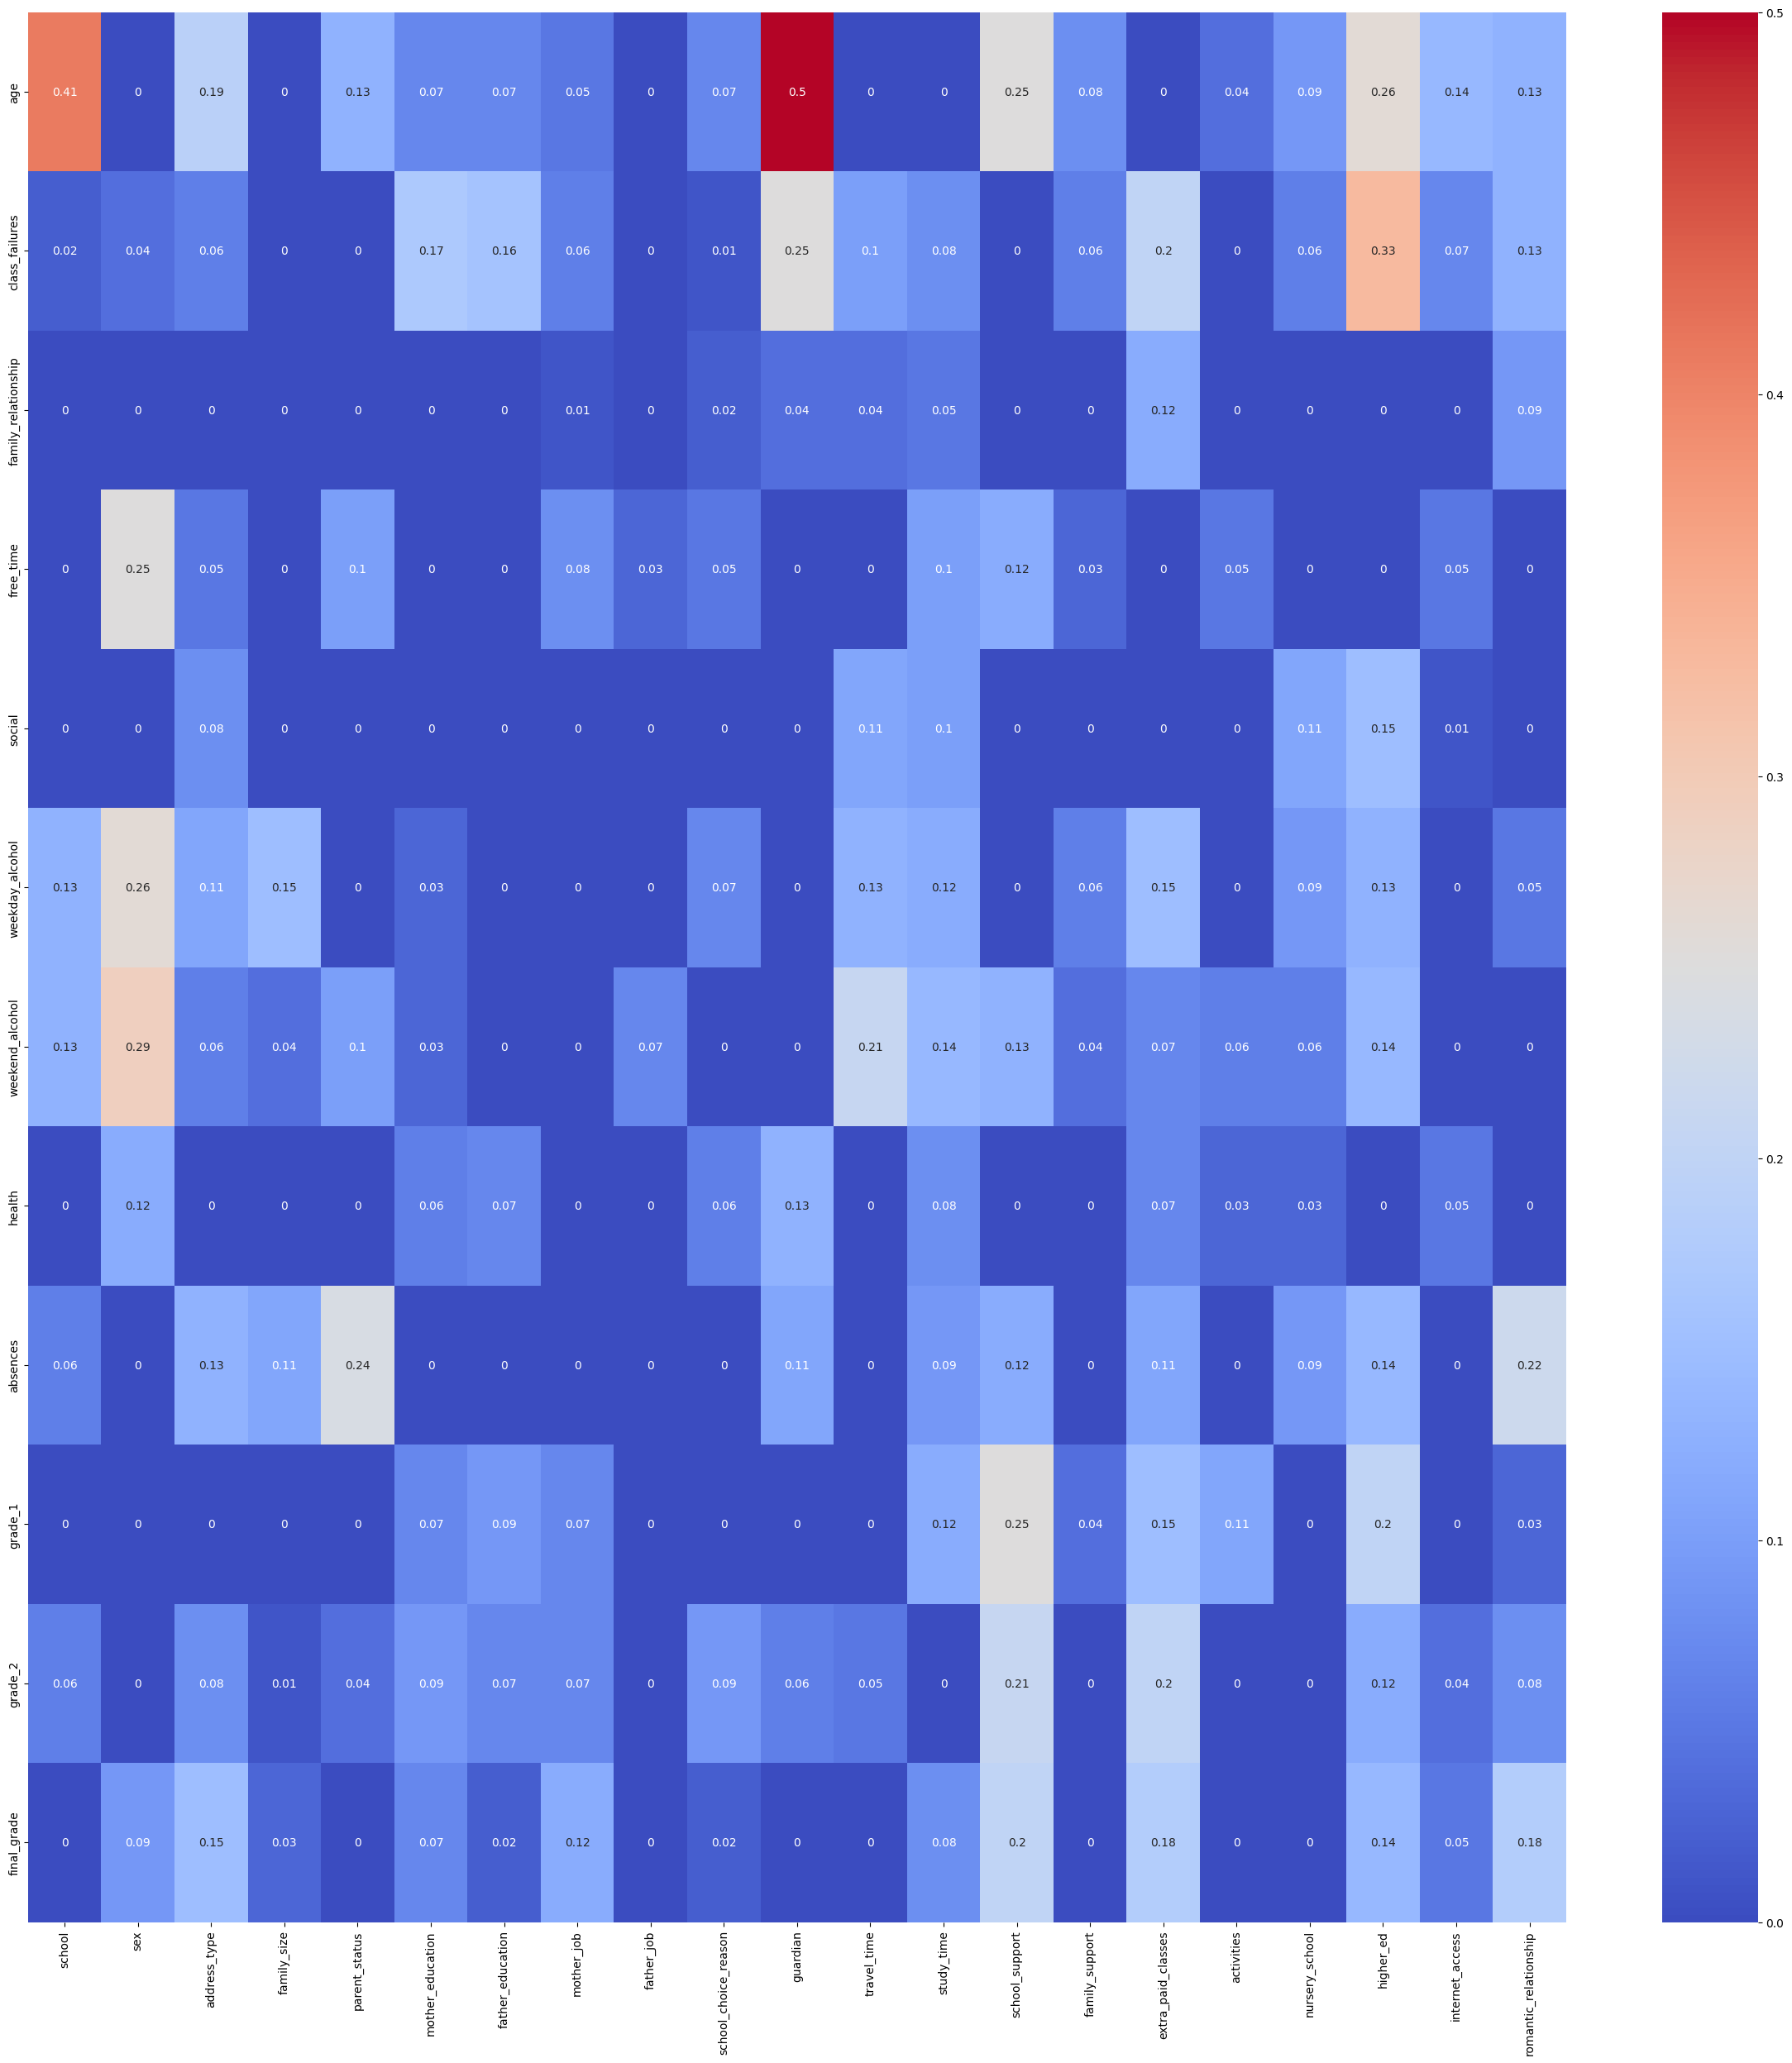

In [14]:
#pairwise relationship between numerical variables and categorical varaiables
rows= []

for var1 in df_num:
    col = []
    for var2 in df_cat :
        cramers =cramers_corrected_stat(pd.crosstab(df_num[var1], df_cat[var2]))
        col.append(round(cramers,2)) # Keeping of to two decimal
    rows.append(col)

cramers_results = np.array(rows)
df_num_cat_corr = pd.DataFrame(cramers_results, columns = df_cat.columns, index =df_num.columns)

#heatmap of the correlation
fig, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(abs(df_num_cat_corr), annot = True, cmap = 'coolwarm')


For numerical and categorical variables, we can see that there guardian is correlated with age, but otherwise there's not much correlation between numerical and categorical variables.

## 5. Scaling Decisions

## 6. Clusterability and Clustering Structure

## 7. Clustering Algorithm Selection Motivation

## 8. Clustering Algorithm Practical Considerations

## 9. Clustering Algorithm #1



## 10. Clustering Algorithm #2

## 11. Discussion

## 12. Conclusion

## References